# **Final Exam**

### Seung Kim
### December 16, 2020

**1. For a fixed total $N$, the adequacy of a model is *inversely* related to the sum of its squared errors of prediction, and the simplicity of a model is *inversely* related to its degrees of freedom.**

**Solution.**

* a. directly; directly
* b. directly; inversely
* c. inversely; directly
* **d. inversely; inversely**

By way of explanation, the most adequate model has a sum of squared errors of 0 (i.e. it predicts everything perfectly), and the most simple model estimates the least parameters (I don't know if it's possible for a model to estimate *no* parameters). 

But since life is complex, increasing adequacy tends to come at a tradeoff of decreased simplicity, and vice versa.

**2a.	A sample of size 25 is drawn from a population having a mean of 70 and a standard deviation of 25. What is the standard error of the sample mean?**

**Solution.**

$$SE = \frac{\sigma}{\sqrt{n}} = \frac{25}{5}=5$$

**2b. A sample of size 25 is drawn from a population having a mean of 90 and a standard deviation of 60. What is the standard error of this sample mean?**

**Solution.**

$$SE = \frac{\sigma}{\sqrt{n}} = \frac{60}{5}=12$$

The population mean is already taken into account in the standard deviation for both 2a and 2b.

**2c.	Assume the process of sampling is done repeatedly as described in parts (a) and (b), and at each stage you compute the difference between the sample mean from part (b) and the sample mean from part (a).**

* i.	The distribution of values of the difference between the sample means over such repeated samplings from the population is known as a <u>*sampling*</u> distribution *(of differences of means)*.

* ii.	The mean of the distribution described in (i) would be <u>20</u>. *Since $E(A-B) = E(A)-E(B)$*

* iii.	The standard deviation of the distribution described in (i) would be <u>13</u>. *Using $\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}$, which I don't actually quite understand*

In [278]:
sqrt((25^2)/25+(60^2)/25)

[1] 13

**3. Explain the role of the sampling distribution in null hypothesis significance testing. How does the interpretation of a $p$-value relate to the sampling distribution of a test statistic?**

**Solution.** While there is no guarantee that the population is normally distributed, the central limit theorem states that we can expect the sampling distribution (of sample means) to approach a normal shape as the sample size increases regardless of the shape of the population distribution. This is great news because, now, we can assume that our sample mean is a score on a normal distribution which means that we can obtain the probability of seeing that sample mean or more extreme (the $p$-value) without going out and empirically building a population distribution (which would be, in the vast majority of cases, impossible). 

**4.	You recently read about the benefits that laughter can have on health, and you decided to conduct a pilot study to investigate the most effective method for inducing laughter. You recruited undergraduates from Boston College and randomly assigned them to one of three groups. The first group watched an hour of The Office, the second group listened to an hour of an audio recording of Dave Chapelle doing stand-up comedy, and the third group read a book of knock-knock jokes for an hour. There were an equal number of participants in each group. The participants were video-taped, and trained raters determined how much time (in minutes) each participant spent laughing. You conduct an omnibus one-way ANOVA and the results of your pilot study are presented below.**

|                | Sum of Squares | df | Mean Square | F     | Sig. |
|----------------|----------------|------|-------------|---------|------|
| Between Groups | 490.000        | 2    | 245.000     | 4.836   | .029 |
| Within Groups  | 608.000        | 12   | 50.667      |         |      |

**You’d like to apply for a grant that will allow you to further study these effects in a population of heart disease patients. The grant source is requiring that your proposed study demonstrate a power of at least .80. Calculate the required sample size that you would need to fulfill the grant agency’s requirement (set $α=.05$ and use $\hat{f}_{unb}$ as your effect size estimate, which you will need to calculate).**

**Solution.** We have:

* $a=3$ since there are three groups (Office, Chapelle, knock-knock);
* $N = 3\cdot(12+3) = 45$ since $df_{within}=12$ and $a=3$ so we can work backwards to find that $n=15$; and
* $F=4.836$.

Sehr gut. Then,

$$\hat{f}_{unb} = \sqrt{\frac{(a-1)}{N}\cdot\Big[\Big(\frac{N-a-2}{N-a}\Big)F-1\Big]}=\sqrt{\frac{(3-1)}{45}\cdot\Big[\Big(\frac{45-3-2}{45-3}\Big)4.836-1\Big]}$$
$$=\sqrt{\frac{2}{45}\cdot\Big[\Big(\frac{40}{42}\Big)4.836-1\Big]} = 0.4003$$

Encourangingly, it's above 0.4, so it counts as 'large effect size' (I think the knock-knock jokes weren't all that funny). All we have to do now is get our required sample size:

In [1]:
library('pwr')

In [2]:
pwr.anova.test(k=3, f=0.4003, sig.level=0.05, power=0.80)


     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 21.07362
              f = 0.4003
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group


Rounding up $n=21.07362$, we need $n=22$ participants per group or $N=66$ for the entire study.

**Researchers at the Boston College are interested in whether student performance is better when a class is taught by a professor as opposed to a graduate student. To test this hypothesis, they examine the final course average on a random sample of students from three sections of PSYC1111, all of which used the same text and grading scheme. Section 1 was taught by a tenured professor, section 2 by a non-tenured professor, and section 3 by a graduate student. The data can be found in a file called “Teaching.csv” in the final exam folder on Canvas. The instructor variable is coded such that 1 = Tenured Professor, 2 = Non-Tenured Professor, and 3 = Graduate Student.**

In [11]:
library(psych)

In [17]:
teaching = data.frame(read.csv('/Users/seung/Repositories/stats/Final/Teaching.csv'))
teaching$Teacher = factor(teaching$Teacher, labels=c('Tenure', 'NonTenure', 'GradStudent'))
describeBy(teaching$Grades, teaching$Teacher)


 Descriptive statistics by group 
group: Tenure
   vars n mean  sd median trimmed   mad min max range  skew kurtosis   se
X1    1 5   88 9.8     90      88 10.38  75  97    22 -0.23    -2.04 4.38
------------------------------------------------------------ 
group: NonTenure
   vars n mean   sd median trimmed  mad min max range skew kurtosis  se
X1    1 5   89 6.48     85      89 2.97  83  97    14 0.28    -2.18 2.9
------------------------------------------------------------ 
group: GradStudent
   vars n mean  sd median trimmed  mad min max range skew kurtosis   se
X1    1 5   76 9.9     75      76 7.41  65  91    26 0.38    -1.61 4.43

In [49]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




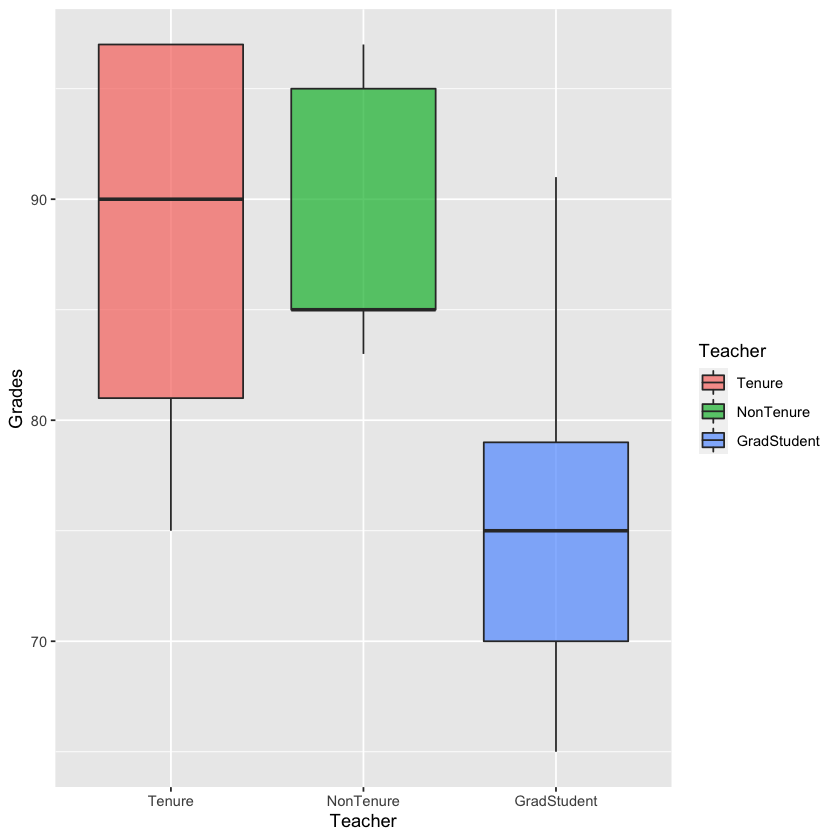

In [60]:
ggplot(teaching, aes(x=factor(Teacher), y=Grades, fill=Teacher))+
            geom_boxplot(alpha=0.7) +
            xlab("Teacher") +
            ylab("Grades")

In [81]:
teaching
teaching$Grades

Grades,Teacher
<int>,<fct>
97,Tenure
97,Tenure
90,Tenure
75,Tenure
81,Tenure
95,NonTenure
85,NonTenure
85,NonTenure
97,NonTenure


[1] 97 97 90 75 81 95 85 85 97 83 75 65 70 79 91

**5. State the models being compared in an omnibus one-way ANOVA of these data (using the cell means parameterization). What restrictions on the parameters of the full model are being tested?**

**Solution.** The full model assumes that the group means are different from the population mean, while the restricted model assumes that the group means are no different from the population mean (and necessarily that there is no difference between the groups). Since the grand mean is 84.333,

* Full: $\mu_j +\epsilon_{ij}$
* Restricted: $84.333+\epsilon_{ij}$

We are, in effect, testing whether the cost of estimating group mean parameters is worth the gain in fit.

**6. Using R, carry out the statistical test comparing these two models and state your conclusion.**


**Solution.** We can quickly get the $F$-statistic:

In [20]:
full = aov(Grades ~ Teacher, data=teaching)
restr = aov(Grades ~ 1, data=teaching)
anova(restr, full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,1467.333,NA,NA,NA,NA
2,12,944.000,2,523.3333,3.326271,0.07090213


Our $df_F = 12$ and our $df_R = 14$. So,

In [21]:
pf(3.326271, 2, 12, lower.tail = FALSE)

[1] 0.07090214

The full model does *not* do significantly better than the restricted model. There is not enough evidence to conclude that there is a difference in student outcomes when taught by either a tenured professor, non-tenured professor, or a graduate student. This is surprising, since in the graph, it looked like there was a really large difference, at least between the Professors vs. the Grad Student conditions.

**7. Specify the coefficients of the contrast that is most relevant to the researchers’ hypothesis, and carry out an appropriate test of this contrast. What do you conclude based on this test?**

**Solution.** Q6 didn't address the researcher's (null) hypothesis that there is no difference between student outcomes with Tenured & Non-tenured Professors (together) vs. Grad Student conditions. The contrast we need to test this hypothesis is:

$$c = \Big[\frac{1}{2}, \frac{1}{2}, -1\Big]$$

Let's quickly calculate $\psi$:

$$\hat{\psi} = \Big(\frac{1}{2}\Big)88 + \Big(\frac{1}{2}\Big)89 + (-1)76 = 12.5$$

This means that the students taught by tenured & non-tenured professors, combined, did 12.5 points better on average than students taught by grad students. Now let's see if this difference is significant. Because R will not cooperate with me, I will have to do this by hand.

Since there are $n=5$ scores per group,

$$E_R - E_F = \frac{\hat{\psi}^2}{\sum_{j=1}^{a}\Big(\frac{c^2_j}{n_j}\Big)} = \frac{156.25}{\frac{0.25}{5}+\frac{0.25}{5}+\frac{1}{5}} = \frac{156.25}{\frac{1.5}{5}}=520.833$$

We know that $df_F = 12$ since we've estimated 3 parameters ($\mu, \alpha_1, \alpha_2$), and our $df_R = 14$ since we only estimate 1 (the $\mu$). So, our $df_R-df_F = 2$ and

$$MS_{between} = 520.833/2 = 260.417$$

And, since $MS_{within}$ is just the average of group variances,

$$MS_{within} = \frac{9.8^2+6.48^2+9.9^2}{3} = 78.6801$$

Then, finally,

$$F = \frac{260.417}{78.680} = 3.3098$$

We're not done yet. We have to find the $p$-value. 

In [72]:
pf(3.3098, 2, 12, lower.tail=FALSE)

[1] 0.07165812

Surprisingly, it's *still* not significant! There is not enough evidence for us to say that student outcomes are significantly better when taught by professors (tenured or not) versus by grad students.

**8. What proportion of the variability in the students’ scores is explained by this contrast?**

**Solution.** We want the $R^2_{effect\, size}$, the proportion that this contrast accounts for out of the total variability in the student scores. 

Since $SS(\psi) = E_R-E_F = 520.833$ from the contrast, and $SS_{total} = SS_{within} + SS_{between} = 1467.333$ from the ANOVA, 

$$520.833/1467.3333 = 0.355$$

The contrast between professors and grad students captures 35.5% of the total variability in students' scores. So I'm still very surprised that it's not significant. 

In [85]:
anova(restr, full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,1467.333,NA,NA,NA,NA
2,12,944.000,2,523.3333,3.326271,0.07090213


**9. After the first analysis was conducted, another researcher takes a look at the results and concludes that there is an additional contrast of interest and tests the difference between the teaching skill of the non-tenured professor and the graduate student. Additionally, this researcher believes it is necessary to report confidence intervals for the contrasts. By what method should the second researcher control for multiple comparisons (assuming he wants to look at both contrasts)? Why? What is the new $F$ critical value?**

**Solution.** Since we're making a post-hoc comparison, we should not use Bonferroni; and since we are not making all (3) possible contrasts, we should not use Tukey's HSD. Our best option is Scheffé's correction, used for complex comparisons that we did not plan.

So let's get it. We have $a=3$ since there are three groups, and $N=15$. Then, 

$$F_{Scheffé}=(a-1)F_{0.05; a-1, N-a}=2F_{0.05;2,13} = 7.611$$

That's our new critical $F$ value, and it's really steep.

In [87]:
2*(qf(0.05, 2, 13, lower.tail=FALSE))

[1] 7.611131

**10. Use R to determine the limits of the confidence intervals for both contrasts. Based on the confidence intervals, what would the second researcher conclude about the statistical significance of these two contrasts?**

**Solution.**

In [100]:
library(MBESS, warn.conflicts=FALSE)

In [98]:
ci.c(means = c(88, 89, 76), s.anova = sqrt(78.6801), c.weights = c(1/2, 1/2, -1), n = 5)

$Lower.Conf.Limit.Contrast
[1] 1.91446

$Contrast
[1] 12.5

$Upper.Conf.Limit.Contrast
[1] 23.08554

In [99]:
ci.c(means = c(88, 89, 76), s.anova = sqrt(78.6801), c.weights = c(0, 1, -1), n = 5)

$Lower.Conf.Limit.Contrast
[1] 0.7768717

$Contrast
[1] 13

$Upper.Conf.Limit.Contrast
[1] 25.22313

Neither intervals dip into zero—that is, we're 95% confident that the $\psi$ in either contrast remains within these limits, and more importantly, that it will not dip to zero, which would imply that the null hypothesis would be retained. Yet we retain the null hypothesis in *both* contrasts! I think I did the intervals wrong but time is in short order for me. My apologies—please let me know what I did wrong. 

In [95]:
describeBy(teaching$Grades, teaching$Teacher)


 Descriptive statistics by group 
group: Tenure
   vars n mean  sd median trimmed   mad min max range  skew kurtosis   se
X1    1 5   88 9.8     90      88 10.38  75  97    22 -0.23    -2.04 4.38
------------------------------------------------------------ 
group: NonTenure
   vars n mean   sd median trimmed  mad min max range skew kurtosis  se
X1    1 5   89 6.48     85      89 2.97  83  97    14 0.28    -2.18 2.9
------------------------------------------------------------ 
group: GradStudent
   vars n mean  sd median trimmed  mad min max range skew kurtosis   se
X1    1 5   76 9.9     75      76 7.41  65  91    26 0.38    -1.61 4.43

First, let's do the second contrast. Since we want to compare only the Non-Tenured and Grad conditions, our contrast will be $c = [0, 1, -1]$. Then,

$$\hat{\psi} = (0)88 + (1)89+(-1)76 = 13$$

Let's find out if this difference of 13 points in favor of Non-Tenured is significant.

$$E_R - E_F = \frac{\hat{\psi}^2}{\sum_{j=1}^{a}\Big(\frac{c^2_j}{n_j}\Big)} = \frac{169}{\frac{0}{5}+\frac{1}{5}+\frac{1}{5}} = \frac{169}{\frac{2}{5}}=422.5$$

Since we know that $df_R-df_F = 2$ from Q7,

$$MS_{between} = \frac{422.5}{2} = 211.25$$

$MS_{within}$ doesn't change,

$$MS_{within} = \frac{9.8^2+6.48^2+9.9^2}{3} = 78.6801$$

So our $F$-statistic is:

$$F=\frac{211.25}{78.6801} = 2.685$$

Cool. So the contrasts are:

* Tenured & Non-Tenured vs. Grad: 3.3098
* Non-Tenured vs Grad: 2.685

We need to find confidence intervals for each.

In [88]:
describeBy(teaching$Grades, teaching$Teacher)


 Descriptive statistics by group 
group: Tenure
   vars n mean  sd median trimmed   mad min max range  skew kurtosis   se
X1    1 5   88 9.8     90      88 10.38  75  97    22 -0.23    -2.04 4.38
------------------------------------------------------------ 
group: NonTenure
   vars n mean   sd median trimmed  mad min max range skew kurtosis  se
X1    1 5   89 6.48     85      89 2.97  83  97    14 0.28    -2.18 2.9
------------------------------------------------------------ 
group: GradStudent
   vars n mean  sd median trimmed  mad min max range skew kurtosis   se
X1    1 5   76 9.9     75      76 7.41  65  91    26 0.38    -1.61 4.43

**11. In the context of this question, comment on the advantages of deciding on an analysis plan prior to, as opposed to after, looking at the data.**

**Solution.** We could have used Bonferroni or Tukey's (DECIDE) had we decided earlier, which would have incurred less penalty. 

**Researchers were interested in whether people with hypochondria show perceptual and explicit memory biases favoring health-related information. A clinical sample of hypochondriacs ($n=20$) and healthy controls ($n=20$) completed a computerized test of perceiving difficult-to-read words and then an encoding task followed by recall of those words. Within each sample, people were randomized to one of four groups. People in the first group saw words related to cardiac health. People randomized to the second group saw words related to cancer. The third group of participants saw government-related words, while the fourth groups saw words relating to school. After seeing the words, participants completed the encoding task and were then asked to recall as many of the previously viewed words as possible. The dependent variable is the number of words recalled. (This question was inspired by Brown, Kosslyn, Delamater, Fama, & Barsky (1999) in Journal of Psychosomatic Research, but I have changed the results from their paper.) The data can be found in a file called “Hypochondia.csv” in the final exam folder on Canvas. For this problem, Factor A is Diagnosis (0 = Control, 1 = Hypochondriac) and Factor B is Word Type (1 = Cardiac, 2 = Cancer, 3 = Government, 4 = School).**

In [137]:
health = data.frame(read.csv('/Users/seung/Repositories/stats/Final/Health.csv'))
health$Diagnosis <- factor(health$Diagnosis, labels = c("Control", "Hypochondriac"))
health$Word <- factor(health$Word, labels = c("Cardiac", "Cancer", "Government", "School"))

**12. Write out the equation for the full model that includes both main effects and the interaction. Define each term. For example, how many $α_j$ parameters are there, and what does each one mean?**

**Solution.** The full model is:

$$Y_{ijk} = \mu + \alpha_j + \beta_k + (\alpha\beta)_{jk} + \epsilon_{ijk}$$

Where

* $\mu$ is an estimate of the population mean by way of the grand mean;
* $\alpha_j$ is the effect of the $j$th of the 2 levels (Control or Hypochondriac) in the the Diagnosis factor;
* $\beta_k$ is the effect of the $k$th of the 4 levels (Cardiac, Cancer, Government, or School) in the Word Type factor;
* $(\alpha\beta)_{jk}$ is the *interaction* effect of the $j$th level in Diagnosis and $k$th level in Word Type factors (there are 8 total);
* $\epsilon_{ijk}$ is the error term, for each $i$th individual score in the intersection of $j$th Diagnosis and $k$th Word Type levels. There are $N=40$.

**13. Using R, obtain cell means, marginal means, and the grand mean. Use this information to calculate $α_2$, $β_3$, and $αβ_{24}$. You do not need to calculate any of the other model terms.**

**Solution.** Let's get the cell means first.

In [138]:
describeBy(health$Correct, list(health$Diagnosis, health$Word), mat = T)

,item,group1,group2,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,Control,Cardiac,1,5,9.4,1.140175,9,9.4,1.4826,8,11,3,0.1943021,-1.748402,0.5099020
X12,2,Hypochondriac,Cardiac,1,5,11.2,0.836660,11,11.2,1.4826,10,12,2,-0.2458756,-1.817959,0.3741657
X13,3,Control,Cancer,1,5,9.4,1.140175,9,9.4,1.4826,8,11,3,0.1943021,-1.748402,0.5099020
X14,4,Hypochondriac,Cancer,1,5,12.0,2.000000,13,12.0,1.4826,9,14,5,-0.4500000,-1.750000,0.8944272
X15,5,Control,Government,1,5,8.8,1.303840,9,8.8,1.4826,7,10,3,-0.2598658,-1.958062,0.5830952
X16,6,Hypochondriac,Government,1,5,8.2,1.303840,8,8.2,1.4826,7,10,3,0.2598658,-1.958062,0.5830952
X17,7,Control,School,1,5,9.0,1.224745,9,9.0,1.4826,8,11,3,0.6531973,-1.400000,0.5477226
X18,8,Hypochondriac,School,1,5,8.4,1.140175,8,8.4,1.4826,7,10,3,0.1943021,-1.748402,0.5099020


Now, the marginal means for the Diagnosis factor:

In [136]:
describeBy(health$Correct, health$Diagnosis, mat = T)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,Control,1,20,9.15,1.136708,9,9.125,1.4826,7,11,4,0.1322556,-0.9831335,0.2541757
X12,2,Hypochondriac,1,20,9.95,2.139233,10,9.875,2.9652,7,14,7,0.2147387,-1.1995974,0.4783469


And the marginal means for the Word Type factor:

In [135]:
describeBy(health$Correct, health$Word, mat = T)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,Cardiac,1,10,10.3,1.337494,10.5,10.375,1.4826,8,12,4,-0.2407395,-1.402030,0.4229526
X12,2,Cancer,1,10,10.7,2.057507,10.5,10.625,2.2239,8,14,6,0.2934521,-1.588162,0.6506407
X13,3,Government,1,10,8.5,1.269296,8.5,8.500,2.2239,7,10,3,0.0000000,-1.820155,0.4013865
X14,4,School,1,10,8.7,1.159502,8.5,8.625,0.7413,7,11,4,0.5234508,-0.777244,0.3666667


Now, to calculate $α_2$, $β_3$, and $αβ_{24}$, we need to get the grand mean ($\mu_{..}$)first.

In [140]:
mean(health$Correct)

[1] 9.55

Then

$$\alpha_2 = 0.4$$

since $\mu_{2.} = 9.95$ so $\mu_{2.}-\mu_{..}=0.4$;

$$\beta_3 = -1.05$$

since $\mu_{.3} = 8.5$ so $\mu_{.3}-\mu_{..} = -1.05$; and

$$\alpha\beta_{24} = -0.7$$

since, given

* $\mu_{24} = 8.4$, 
* $\alpha_{2} = 0.4$, and
* $\mu_{.4} = 8.7 \therefore \beta_4 = -0.85$,

$$\alpha\beta_{jk} = \mu_{jk}-(\mu_{..} + \alpha_j + \beta_k) = 8.4-(9.55+0.4-0.85)=-0.7$$

**14. Make a plot of the cell means, putting Word Type on $x$-axis.**

In [117]:
library(ggpubr)

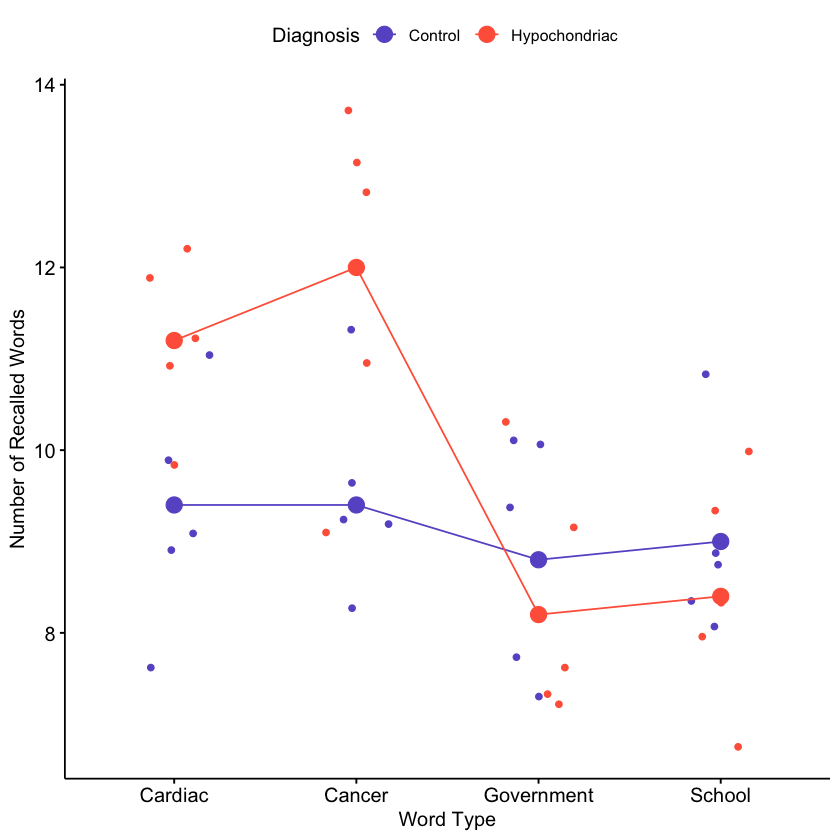

In [134]:
int_plot <- ggline(health, x = "Word", y = "Correct", color = "Diagnosis",
                add = c("mean", "jitter"),
                   palette = c("slateblue", "tomato"),
                  xlab = "Word Type",
                   ylab = "Number of Recalled Words",
                  point.size = 3)

int_plot

Wow, looks like a big frickin' interaction.

**15. Using R, carry out the three tests for this factorial ANOVA. Which effects are significant?**

**Solution.**

In [141]:
anova <- aov(Correct ~ Word + Diagnosis + Word*Diagnosis, data = health)
summary(anova)

               Df Sum Sq Mean Sq F value   Pr(>F)    
Word            3   37.1  12.367   7.328 0.000713 ***
Diagnosis       1    6.4   6.400   3.793 0.060300 .  
Word:Diagnosis  3   20.4   6.800   4.030 0.015391 *  
Residuals      32   54.0   1.688                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The **main effect of Word Type** and the **interaction** are significant.

**16. Report the critical values that you would use to evaluate the two main effects and the interaction if you were carrying out these tests by hand.**

**Solution.** OK, three values. 

1. For the main effect of the Diagnosis factor, $df_{num} = (a-1) = (2-1)=1$ and $df_{denom} = ab(n-1) = 2\cdot4\cdot(5-1)=32$; so 

$$F_{A} = F_{0.05; 1, 32}=4.149$$

2. For the main effect of the Word factor, $df_{num} = (b-1) = (4-1)=3$ and $df_{denom} = ab(n-1) = 2\cdot4\cdot(5-1)=32$; so

$$F_{B} = F_{0.05; 3, 32}=2.901$$

3. For the interaction, $df_{num}=(a-1)(b-1) = (1\cdot3) = 3$ and $df_{denom} = ab(n-1) = 2\cdot4\cdot(5-1)=32$, so it's the same as $F_{B}$.

$$F_{AB} = F_{0.05; 3, 32}=2.901$$

Which makes sense, given that both Word (7.328) and Interaction (4.030) are more extreme than $F_B = F_{AB}=2.901$ while Diagnosis (3.793) is less extreme than $F_A=4.149$.

In [143]:
qf(0.05, 1, 32, lower.tail=FALSE)

[1] 4.149097

In [144]:
qf(0.05, 3, 32, lower.tail=FALSE)

[1] 2.90112

**17. Calculate $R^2$ for the omnibus interaction effect.**

**Solution.** OK, so there's a bit of art to picking what to include in $SS_{total}$ but I am no artist. Because there will always be hypochondriacs and there will always be words about cancer & school in the wild, I will assume that all factors are intrinsic and *not* go with $R^2_{partial}$. In the case where one or both are not intrinsic, then we can just remove them from $SS_{total}$.

We found in Q15 that

* $SS_A = 37.1$,
* $SS_B = 6.4$,
* $SS_{AB} = 20.4$, and
* $SS_{within} = 54.0$.

Since we are interested in the amount of total variability explained by the interaction, 

$$R^2_{AB}=\frac{SS_{AB}}{SS_{total}} = \frac{SS_{AB}}{SS_{A}+SS_{B}+SS_{AB}+SS_{within}} = \frac{20.4}{117.9}=0.173$$

So 17.3% of the variability is explained by the interaction.

**18. Test the simple effect of Word Type at each level of Diagnosis, correcting for familywise error. What do you conclude?**

**Solution.** There are two simple effects of Word: one at Control ($A_1$) and one at Hypochondriac ($A_2$). We are getting the conditional effect of a level in Word **given** that it is in Control or in Hypochondriac. So we're looking to find $F_{B\, at \, A_i}$:

In [175]:
library(phia, warn.conflicts=FALSE)

In [176]:
testInteractions(anova,                         
                 fixed = "Diagnosis",               
                 across = "Word")

,Word1,Word2,Word3,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Control,0.4,0.4,-0.2,3,1.35,0.2666667,8.489105e-01
Hypochondriac,2.8,3.6,-0.2,3,56.15,11.0913580,7.543339e-05
Residuals,NA,NA,NA,32,54.00,NA,NA


So far so good. To correct familywise error, we can just divide our $\alpha$ by the number of simple effects. In our  case we have 2, so $\alpha_{PC} = 0.05/2=0.025$.

In [220]:
qf(0.0125, 3, 32, lower.tail=FALSE)

[1] 4.235797

So there's no difference between Word types in the Control level of Diagnosis, while there *is* a difference between Word types in the Hypochondrial level. In other words, there is a statistically significant difference in number of recall among the four kinds of words in hypochondriacs, but not in controls.

**19. Test the simple effect of Diagnosis at each level of Word Type, correcting for familywise error? What do you conclude?**

**Solution.** There are four simple effects of Diagnosis, at Cardiac ($B_1$), Cancer ($B_2$), Government ($B_3$), and School ($B_4$) levels. We want to find out what the conditional effects of Diagnosis are, given that we are in any of the Word factor levels. Let's get all our $F_{A\, at\, B_i}$:

In [182]:
testInteractions(anova,                         
                 fixed = "Word",               
                 across = "Diagnosis")

,Value,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cardiac,-1.8,1,8.1,4.8000000,0.10757250
Cancer,-2.6,1,16.9,10.0148148,0.01358617
Government,0.6,1,0.9,0.5333333,0.94104390
School,0.6,1,0.9,0.5333333,0.94104390
Residuals,NA,32,54.0,NA,NA


So far so good. To correct familywise error, we can just divide our $\alpha$ by the number of simple effects. In our  case we have 4, so $\alpha_{PC} = 0.05/4 = 0.0125$.

In [218]:
qf(0.0125, 1, 32, lower.tail=FALSE)

[1] 7.005702

So there is a significant difference between the two levels in Diagnosis in the Cancer level of Word only. That is, the control and the hypochondriacs are significantly different in the number of correctly recalled cancer-related words, and not for any other categories of words.

**20. Based on the results of the simple effects analysis, carry out all pairwise comparisons for Word Type within any levels of Diagnosis where it makes sense to do so. Make sure you control for familywise error. What do you conclude?**

**Solution.** It looks like it would make most sense to carry out all pairwise comparisons in the Hypochondriac level. It would make most sense to use Tukey's HSD, since we're doing all pairwise comparisons and it's post-hoc (*Q: this is post-hoc, right? Since we decided to test it after looking at Q18 and 19?*). 

Well, let's get on with it. First we get R to display all the cell means in order:

In [184]:
Cell_Means <- emmeans(anova, ~ Word*Diagnosis)
Cell_Means

 Word       Diagnosis     emmean    SE df lower.CL upper.CL
 Cardiac    Control          9.4 0.581 32     8.22    10.58
 Cancer     Control          9.4 0.581 32     8.22    10.58
 Government Control          8.8 0.581 32     7.62     9.98
 School     Control          9.0 0.581 32     7.82    10.18
 Cardiac    Hypochondriac   11.2 0.581 32    10.02    12.38
 Cancer     Hypochondriac   12.0 0.581 32    10.82    13.18
 Government Hypochondriac    8.2 0.581 32     7.02     9.38
 School     Hypochondriac    8.4 0.581 32     7.22     9.58

Confidence level used: 0.95 

Then we write out the contrasts for all pairwise comparisons (never thought combinatorics would come in useful) and run them all:

In [232]:
contrasts = list("Cardiac vs. Cancer" = c(0, 0, 0, 0, 1, -1, 0, 0),
                 "Cardiac vs. Government" = c(0, 0, 0, 0, 1, 0, -1, 0),
                 "Cardiac vs. School" = c(0, 0, 0, 0, 1, 0, 0, -1),
                 "Cancer vs. Government" = c(0, 0, 0, 0, 0, 1, -1, 0),
                 "Cancer vs. School" = c(0, 0, 0, 0, 0, 1, 0, -1),
                 "Government vs. School" = c(0, 0, 0, 0, 0, 0, 1, -1)) # social commentary

c = contrast(Cell_Means, contrasts, adjust = "none")
c

 contrast               estimate    SE df t.ratio p.value
 Cardiac vs. Cancer         -0.8 0.822 32 -0.974  0.3375 
 Cardiac vs. Government      3.0 0.822 32  3.651  0.0009 
 Cardiac vs. School          2.8 0.822 32  3.408  0.0018 
 Cancer vs. Government       3.8 0.822 32  4.625  0.0001 
 Cancer vs. School           3.6 0.822 32  4.382  0.0001 
 Government vs. School      -0.2 0.822 32 -0.243  0.8092 


Well, we have to square the $t$ statistics before we can use them, so:

In [234]:
(data.frame(c)$t.ratio)^2

[1]  0.94814815 13.33333333 11.61481481 21.39259259 19.20000000  0.05925926

OK, I hope I'm not wrong. But since we are talking about Word levels *at* two Diagnoses, we have to use the $\alpha = 0.025$ we used in Q18. And since there are 4 levels within Word, we have to put 4 as `nmeans`. 

In [235]:
q = qtukey(0.025, 4, 32, lower.tail=FALSE)
(q^2)/2

[1] 9.039999

Then we get $F_{HSD}=9.040$. The pairwise comparisons 

* Cardiac vs. Government,
* Cardiac vs. School,
* Cancer vs. Government, and 
* Cancer vs. School

are all significant, as we would expect! Within hypochondriacs, there is a difference these categories with respect to their recall performance.

**21. Come up with a contrast to test whether hypochondriacs have better recall for health-related words than non-health-related words. Control for familywise error. What do you conclude?**

**Solution.** Only a single contrast. Let's quickly run the contrast:

In [248]:
contrasts = list("Health vs. Non-Health in Hypochondriacs" = c(0, 0, 0, 0, 0.5, 0.5, -0.5, -0.5))
contrast(Cell_Means, contrasts, adjust = "none")

 contrast                                estimate    SE df t.ratio p.value
 Health vs. Non-Health in Hypochondriacs      3.3 0.581 32 5.680   <.0001 


In [239]:
(5.680^2)/2

[1] 16.1312

We would like to use Scheffé's correction since this contrast is complex, and Scheffé's allows either planned or post-hoc (this one being post-hoc). Since we have 4 groups, $a = 4$, and $N=20$ since, as far as the contrast is concerned, there are only the hypochondriacs. Then,

$$F_{Scheffé} = (a-1)F_{0.05; a-1, N-a} = (4-1)F_{0.05; 4-1, 20-4} = 3F_{0.05;3,16} = 9.717$$

In [241]:
3*qf(0.05, 3, 16, lower.tail=FALSE)

[1] 9.716615

Since $F=16.131$ is well above $F_{Scheffé} = 9.717$, we are in the clear. Hypochondriacs have significantly better recall for health-related words than non-health-related words. 

**22. Report Cohen’s $d$ for the contrast you tested in #21.**

**Solution.** We can get $\psi$ using our contrast from Q21 and the group means:

$$\hat{\psi} = \frac{1}{2}11.2 + \frac{1}{2}12 -\frac{1}{2}8.2 -\frac{1}{2}8.4$$
$$=3.3$$

And we can get $MS_{within} = 1.688$ from earlier when we used `anova`. Then,

$$d = \frac{\psi}{\sqrt{MS_{within}}} = \frac{3.3}{\sqrt{1.688}}=2.540$$

**23. After looking at the data, you suspect that hypochondriacs have better recall for health-related words than non-health-related words, but that this effect is not present in the control group. Come up with the appropriate interaction contrast that allows you to test whether the effect differs between the hypochondriac and control groups. Make sure you control for familywise error. What do you conclude?**

**Solution.** OK, this is about to be real messy. Our null hypothesis is that the hypochondriacs and the control have the same sort of relationship between health-related words and non-health-related words.

In [250]:
Cell_Means

 Word       Diagnosis     emmean    SE df lower.CL upper.CL
 Cardiac    Control          9.4 0.581 32     8.22    10.58
 Cancer     Control          9.4 0.581 32     8.22    10.58
 Government Control          8.8 0.581 32     7.62     9.98
 School     Control          9.0 0.581 32     7.82    10.18
 Cardiac    Hypochondriac   11.2 0.581 32    10.02    12.38
 Cancer     Hypochondriac   12.0 0.581 32    10.82    13.18
 Government Hypochondriac    8.2 0.581 32     7.02     9.38
 School     Hypochondriac    8.4 0.581 32     7.22     9.58

Confidence level used: 0.95 

Given the above order, that means something like:

$$(\mu_{11}+\mu_{12})-(\mu_{13}+\mu_{14}) = (\mu_{21}+\mu_{22})-(\mu_{23}+\mu_{24})$$

Miraculously, through algebra, 

$$\mu_{11}+\mu_{12}-\mu_{13}-\mu_{14}-\mu_{21}-\mu_{22}+\mu_{23}+\mu_{24}=0$$



So our contrast should be 

$$\Big[\frac{1}{2}, \frac{1}{2}, -\frac{1}{2}, -\frac{1}{2}, -\frac{1}{2}, -\frac{1}{2}, \frac{1}{2}, \frac{1}{2}\Big]$$

Which looks like some sort of a centipede. And we can just shwoop that in:

In [249]:
contrasts = list("Health vs. Non-Health in Hypochondriacs vs. Control" = c(0.5, 0.5, -0.5, -0.5, -0.5, -0.5, 0.5, 0.5))
contrast(Cell_Means, contrasts, adjust = "none")

 contrast                                            estimate    SE df t.ratio
 Health vs. Non-Health in Hypochondriacs vs. Control     -2.8 0.822 32 -3.408 
 p.value
 0.0018 


And we'll square the $t$ statistic to get our $F$:

In [254]:
(-3.408)^2

[1] 11.61446

And we'll use Scheffé's correction, since this is a complex comparison. But it's a little different this time. We have $a=2$ and $b=4$ groups, and $N=40$ since we care about both Hypochondriacs and Control. And it looks like we use $df =32$ rather than $N-a = 38$. Then,

$$F_{Scheffé} = (a-1)(b-1)F_{0.05; (a-1)(b-1), 32} = (1)(3)F_{0.05; (1)(3), 32} = 3F_{0.05;3,32} = 8.703$$

In [255]:
3*qf(0.05, 3, 32, lower.tail=FALSE)

[1] 8.703359

There we have it. That actually wasn't so bad. $F=11.614$ is more extreme than $F_{Scheffé} = 8.703$. Therefore, we have a reason to believe that hypochondriacs do, in fact, have better recall of health-related words than the control.

**24. What proportion of the omnibus interaction sum of squares is accounted for by the interaction contrast you tested in #23?**

**Solution.**

We found in Q15 that $SS_{AB}=20.4$. Because I don't know how to find the sum of squares of this Q23's interaction by R, I will unfortunately have to calculate it by hand. 

Let's first get $\psi$:

In [262]:
means = data.frame(Cell_Means)$emmean
contrast = c(0.5, 0.5, -0.5, -0.5, -0.5, -0.5, 0.5, 0.5)
psi = sum(means*contrast)
psi

[1] -2.8

Since $n=5$,

$$SS_\psi = \frac{n(\psi)^2}{\sum c^2} = \frac{5\cdot(-2.8)^2}{\sum c^2} = 19.6$$

In [267]:
denom = sum(contrast^2)
nom = 5*((-2.8)^2)
nom/denom

[1] 19.6

Finally, we can figure out just what percent of $SS_{AB}$ this interaction contrast accounts for:

In [268]:
19.6/20.4

[1] 0.9607843

This interaction contrast accounts for 96.1% of the omnibus interaction effect!

**25. Suppose you were writing up the results of this study with your lab mates, and one of them wrote that there was no effect of diagnosis because the omnibus effect was non-significant. Do you agree with your lab mate’s conclusion? Why or why not? If not, how would you write up the results instead?**

**Solution.** He seems to be referring to these results, where Diagnosis only accounts for 0.054% of the $SS_{total}$:

In [271]:
anova <- aov(Correct ~ Word + Diagnosis + Word*Diagnosis, data = health)
summary(anova)

               Df Sum Sq Mean Sq F value   Pr(>F)    
Word            3   37.1  12.367   7.328 0.000713 ***
Diagnosis       1    6.4   6.400   3.793 0.060300 .  
Word:Diagnosis  3   20.4   6.800   4.030 0.015391 *  
Residuals      32   54.0   1.688                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

I disagree with him. We know that a) interaction contrasts can tell you whether one effect differs from another effect and b) interaction contrasts are subeffects of the omnibus interaction. From Q23 we know that Diagnosis does play a statistically significant role in how the participant does with respect to health vs. non-health-related words, and from Q24 we know that the interaction of Q23 accounts for 96.1% of the omnibus interaction effect, or 16.6% of $SS_{total}$, which is really not a small chunk. I would write that, while the factor Diagnosis has no significant main effect, it accounts for the majority of the effect within the interaction, so it is significant.

*Obviously I don't know how to say this in a less clumsy way (and probably don't understand it as well as I should). I would appreciate getting comments back.*